In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

In [3]:
#Data Prepration
import re

In [4]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""


In [5]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
# lower all characters
sentences = sentences.lower()


In [6]:
words = sentences.split()
vocab = set(words)


In [7]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [8]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}


In [10]:
# data - [(context), target]
data = []
for i in range(2, len(words) - 2):
  context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
  target = words[i]
  data.append((context, target))
print(data[:5])


[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [11]:
embeddings = np.random.random_sample((vocab_size, embed_dim))


In [13]:
def linear(m, theta):
  w = theta
  return m.dot(w)

In [14]:
def log_softmax(x):
  e_x = np.exp(x - np.max(x))
  return np.log(e_x / e_x.sum())


In [15]:
def NLLLoss(logs, targets):
  out = logs[range(len(targets)), targets]
  return -out.sum()/len(out)


In [16]:
def log_softmax_crossentropy_with_logits(logits,target):
  out = np.zeros_like(logits)
  out[np.arange(len(logits)),target] = 1
  softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
  return (- out + softmax) / logits.shape[0]

In [17]:
def forward(context_idxs, theta):
  m = embeddings[context_idxs].reshape(1, -1)
  n = linear(m, theta)
  o = log_softmax(n)
  return m, n, o

In [18]:
def backward(preds, theta, target_idxs):
  m, n, o = preds
  dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
  dw = m.T.dot(dlog)
  return dw

In [19]:
def optimize(theta, grad, lr=0.03):
  theta -= grad * lr
  return theta

In [21]:
#Genrate training data
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [23]:
epoch_losses = {}
for epoch in range(80):
  losses = []
  for context, target in data:
    context_idxs = np.array([word_to_ix[w] for w in context])
    preds = forward(context_idxs, theta)
    target_idxs = np.array([word_to_ix[target]])
    loss = NLLLoss(preds[-1], target_idxs)
    losses.append(loss)
    grad = backward(preds, theta, target_idxs)
    theta = optimize(theta, grad, lr=0.03)
  epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

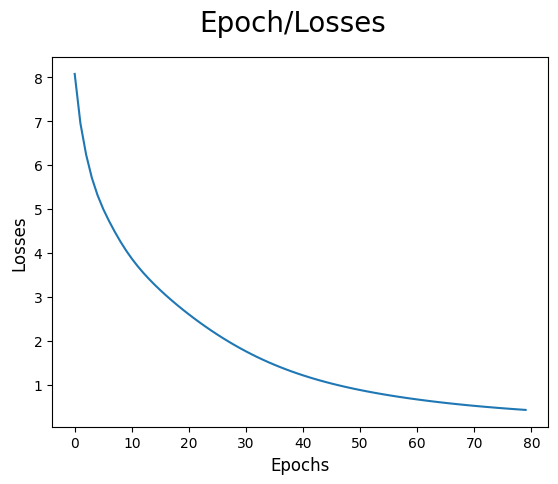

In [24]:
ix = np.arange(0,80)
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [25]:
def predict(words):
  context_idxs = np.array([word_to_ix[w] for w in words])
  preds = forward(context_idxs, theta)
  word = ix_to_word[np.argmax(preds[-1])]
  return word

In [26]:
# (['we', 'are', 'to', 'study'], 'about')
predict(['we', 'are', 'to', 'study'])

'about'

In [27]:
def accuracy():
  wrong = 0
  for context, target in data:
    if(predict(context) != target):
      wrong += 1
  return (1 - (wrong / len(data)))

In [28]:
accuracy()


1.0

In [30]:
predict(['processes', 'manipulate', 'things', 'study'])

'the'